In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
import os
path = os.listdir('../Desktop/traininig')
classes = {'NORMAL': 0, 'PNEUMONIA':1}

In [20]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '‪C:/Users/acer/Desktop/traininig/' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

np.unique(Y)

array([0, 1])

In [21]:
X = np.array(X)
Y = np.array(Y)

In [22]:
pd.Series(Y).value_counts()

1    860
0    460
dtype: int64

In [23]:
X.shape

(1320, 200, 200)

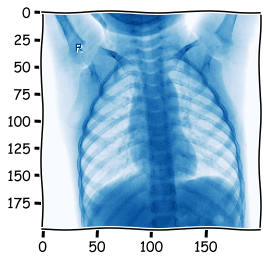

In [24]:
with plt.xkcd():
    plt.imshow(X[0], cmap='Blues')

In [25]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1320, 40000)

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=0.20)

In [27]:
xtrain.shape, xtest.shape

((1056, 40000), (264, 40000))

In [28]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [29]:
from sklearn.decomposition import PCA

In [30]:
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

(1056, 40000) (264, 40000)


In [31]:
pca_test.shape, pca_train.shape

((264, 617), (1056, 617))

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [33]:
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [34]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [35]:
pca_train.shape

(1056, 617)

In [36]:
print("training score: ", lg.score(pca_train, ytrain))
print("testing score: ", lg.score(pca_test, ytest))

training score:  1.0
testing score:  0.9696969696969697


In [37]:
print("training score: ", sv.score(pca_train, ytrain))
print("testing score: ", sv.score(pca_test, ytest))

training score:  0.9962121212121212
testing score:  0.9696969696969697


In [38]:
pca_test.shape

(264, 617)

In [158]:
pred = sv.predict(pca_test)
misclassified = np.where(ytest != pred)
misclassified

(array([  0,   2,   3,   5,   6,   7,   8,   9,  10,  11,  12,  14,  15,
         18,  19,  20,  21,  22,  23,  25,  26,  28,  29,  30,  31,  36,
         37,  38,  39,  42,  43,  44,  45,  46,  47,  48,  53,  54,  58,
         59,  61,  62,  63,  67,  68,  69,  70,  71,  72,  73,  74,  75,
         77,  78,  80,  81,  82,  84,  85,  88,  90,  91,  92,  94,  97,
         98, 100, 101, 106, 109, 110, 111, 112, 113, 114, 115, 117, 118,
        119, 120, 125, 127, 128, 129, 131, 132, 133, 134, 136, 137, 138,
        140, 142, 144, 147, 148, 149, 150, 154, 155, 156, 158, 160, 161,
        162, 164, 165, 166, 167, 169, 170, 171, 172, 173, 176, 177, 178,
        180, 183, 185, 189, 190, 192, 193, 195, 197, 198, 199, 200, 202,
        206, 207, 209, 210, 211, 214, 215, 218, 219, 220, 222, 223, 224,
        225, 227, 228, 230, 232, 233, 236, 239, 240, 241, 242, 244, 245,
        246, 248, 251, 252, 253, 260, 261, 263], dtype=int64),)

In [167]:
print("Total misclassified samples : ",len(misclassified [0]))
print(pred[32], ytest[36])

Total misclassified samples :  164


IndexError: index 32 is out of bounds for axis 0 with size 1

In [42]:
dec = {0: 'NORMAL', 1: 'PNEUMONIA'}

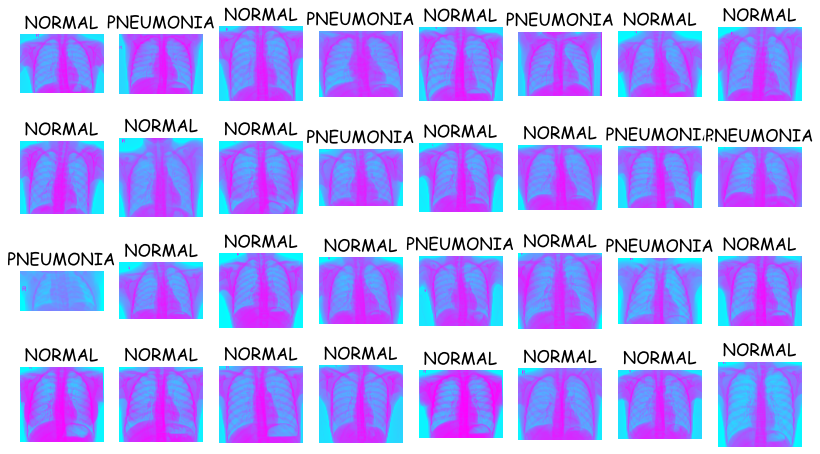

In [129]:
plt.figure(figsize=(14,8))
p = os.listdir('../Desktop/testing')
c=1
with plt.xkcd():

    for i in os.listdir('../Desktop/testing')[:32]:
        plt.subplot(4,8,c)

        img = cv2.imread('C:/Users/acer/Desktop/testing/' + i, 0)
        img1 = cv2.resize(img, (200,200))
        img1 = img1.reshape(1,-1)/255
        pca_test = pca.transform(img1)
        p = sv.predict(pca_test)
        plt.title(dec[p[0]])
        plt.imshow(img, cmap='cool')
        plt.axis('off')
        c+=1

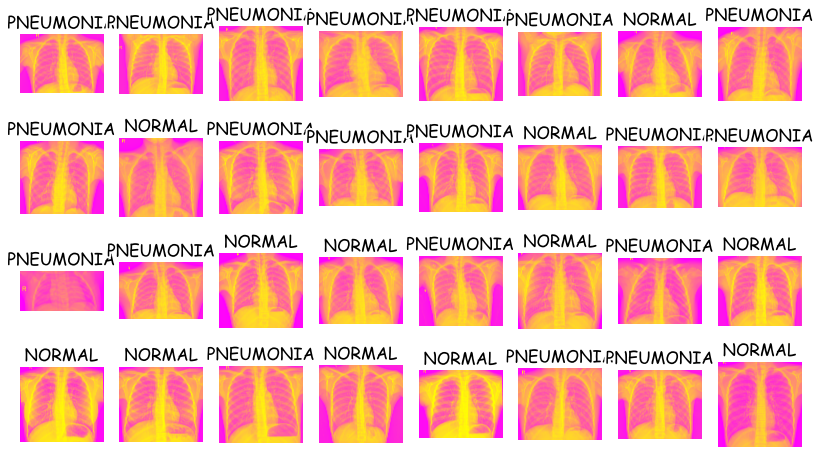

In [171]:
plt.figure(figsize=(14,8))
p = os.listdir('../Desktop/testing')
c=1
with plt.xkcd():

    for i in os.listdir('../Desktop/testing')[:32]:
        plt.subplot(4,8,c)

        img = cv2.imread('C:/Users/acer/Desktop/testing/' + i, 0)
        img1 = cv2.resize(img, (200,200))
        img1 = img1.reshape(1,-1)/255
        pca_test = pca.transform(img1)
        p = lg.predict(pca_test)
        plt.title(dec[p[0]])
        plt.imshow(img, cmap='spring')
        plt.axis('off')
        c+=1